## Examples with ```CopasiProcess``` using ``builder.Builder`` and ``biosimulator_processes.data_model``

In [1]:
import sys 

sys.path.insert(0, '..')

In [2]:
from builder import Builder, Process
from process_bigraph import pp, pf 
from biosimulator_processes import CORE
from biosimulator_processes.data_model import *
from biosimulator_processes.biosimulator_builder import BiosimulatorBuilder

CobraProcess registered successfully.
CopasiProcess registered successfully.
SmoldynProcess not available. Error: 
PLEASE NOTE: Smoldyn is not correctly installed on your system which prevents you from using the SmoldynProcess. Please refer to the README for further information on installing Smoldyn.


/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-KVuYbFzt-py3.10/lib/python3.10/site-packages/pydantic/_internal/_fields.py:151: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-KVuYbFzt-py3.10/lib/python3.10/site-packages/pydantic/_internal/_fields.py:151: UserWarning: Field "model_source" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/Users/alex/Library/Caches/pypoetry/virtualenvs/biosimulator-processes-KVuYbFzt-py3.10/lib/python3.10/site-packages/pydantic/_internal/_fields.py:151: UserWarning: Field "model_language" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protecte

#### Initialize a fresh instance of the `BiosimulatorBuilder`, which is inherently configured by `biosimulator_processes.CORE`.

In [3]:
b = BiosimulatorBuilder()

In [7]:
###### list registered processes

b.list_processes()

['CopasiProcess', 'console-emitter', 'ram-emitter', 'CobraProcess']

In [8]:
from basico import *
from basico import biomodels


model = load_biomodel('BIOMD0000000861')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

In [6]:
get_species(model=model)

NameError: name 'model' is not defined

#### Example 1: Add a simple `CopasiProcess`-based composite to the bigraph, specifying parameter values through the `data_model`. For now, let's try loading a biomodel and adding a change to initial concentration of a species

In [13]:
# 1. specify model changes
process_model_changes = ModelChanges(
    species_changes=[SpeciesChanges(name='SHP1', initial_concentration=5.00000)]
)


pp(process_model_changes.model_dump())

{ 'global_parameter_changes': [],
  'reaction_changes': [],
  'species_changes': [ { 'expression': '',
                         'initial_concentration': 5.0,
                         'initial_expression': '',
                         'initial_particle_number': None,
                         'name': 'SHP1',
                         'unit': ''}]}


In [14]:
# 2. define the model schema to be used by the composite process (one of the copasiprocess config parameters)

process_model = Model(
    model_id='simple_copasi_process',
    model_source='BIOMD0000000861',
    model_name='Simple Composite Process',
    model_changes=process_model_changes
)


pp(process_model.model_dump())

{ 'model_changes': { 'global_parameter_changes': [],
                     'reaction_changes': [],
                     'species_changes': [ { 'expression': '',
                                            'initial_concentration': 5.0,
                                            'initial_expression': '',
                                            'initial_particle_number': None,
                                            'name': 'SHP1',
                                            'unit': ''}]},
  'model_id': 'simple_copasi_process',
  'model_language': 'sbml',
  'model_name': 'Simple Composite Process',
  'model_source': {'value': 'BIOMD0000000861'},
  'model_units': None}


In [15]:
# 3. Define config schema to be used as 'config' parameter of Process constructor


process_config = CopasiProcessConfigSchema(
    method='stochastic',
    model=process_model,
    process_name='simple_copasi'
)


process_config_dict = process_config.model_dump()
process_config_dict.pop('process_name')
pp(process_config_dict)

{ 'method': 'stochastic',
  'model': { 'model_changes': { 'global_parameter_changes': [],
                                'reaction_changes': [],
                                'species_changes': [ { 'expression': '',
                                                       'initial_concentration': 5.0,
                                                       'initial_expression': '',
                                                       'initial_particle_number': None,
                                                       'name': 'SHP1',
                                                       'unit': ''}]},
             'model_id': 'simple_copasi_process',
             'model_language': 'sbml',
             'model_name': 'Simple Composite Process',
             'model_source': {'value': 'BIOMD0000000861'},
             'model_units': None}}


In [16]:
process_config.model

{'model_id': 'simple_copasi_process',
 'model_source': {'value': 'BIOMD0000000861'},
 'model_language': 'sbml',
 'model_name': 'Simple Composite Process',
 'model_changes': {'species_changes': [{'name': 'SHP1',
    'unit': '',
    'initial_concentration': 5.0,
    'initial_particle_number': None,
    'initial_expression': '',
    'expression': ''}],
  'global_parameter_changes': [],
  'reaction_changes': []},
 'model_units': None}

In [17]:
process_config.model

{'model_id': 'simple_copasi_process',
 'model_source': {'value': 'BIOMD0000000861'},
 'model_language': 'sbml',
 'model_name': 'Simple Composite Process',
 'model_changes': {'species_changes': [{'name': 'SHP1',
    'unit': '',
    'initial_concentration': 5.0,
    'initial_particle_number': None,
    'initial_expression': '',
    'expression': ''}],
  'global_parameter_changes': [],
  'reaction_changes': []},
 'model_units': None}

In [18]:
# 4. Add the process instance by the name of 'simple_copasi' to the builder


b[process_config.process_name].add_process(
    name='CopasiProcess',
    model=process_config.model,
    method=process_config.method
)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>

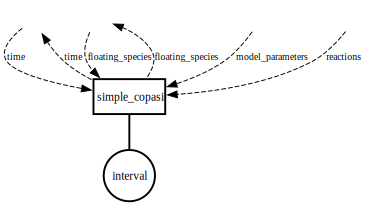

In [12]:
# visualize shows the process with its disconnected ports
b.visualize()

In [ ]:
b

### print ports

In [ ]:
b['event_process'].interface(True)

### connect ports using connect_all
`Builder.connect_all` connects ports to stores of the same name.

In [ ]:
b.connect_all(append_to_store_name='_store')
b

In [ ]:
b.visualize()

### add interval process to the config

In [ ]:
b['interval_process'].add_process(
    name='GillespieInterval',
)

In [ ]:
b.visualize()

### connect port to specific target

In [ ]:
# to connect a port in a more targeted way, use connect and specify the port and its target path
b['interval_process'].connect(port='interval', target=['event_process', 'interval']) 

# the remaining ports can connect_all
b.connect_all() 

In [ ]:
b.visualize()

### check current Builder config

In [ ]:
b

## Update the initial state

In [ ]:
initial_state = {
    'DNA_store': {
        'A gene': 2.0,
        'B gene': 1.0},
}
b.update(initial_state)

## Generate composite from builder config and simulate

In [ ]:
composite = b.generate()
composite.run(10)

In [ ]:
composite

## Retrieve the composite document

In [ ]:
doc = b.document()
doc

### save the document to file

In [ ]:
b.write(filename='toy_bigraph')

### load a composite from document
This document represents the full state of the composite, and so can reproduce the previous composite when loaded into a fresh Builder

In [ ]:
b2 = Builder(core=core, file_path='out/toy_bigraph.json')
b2

In [ ]:
b2.visualize()

### Example 2: Parameter scan composite